# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [42]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
from skimage import filter as filters
from skimage import exposure

from matplotlib import cm
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from skimage.filters import threshold_otsu
from scipy import signal
from scipy import signal
from scipy import misc
import math

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [43]:
def conv_fn(x0,h) :
    x = np.zeros(x0.size + 2*h.size)
    for i in range(0, x0.size):
        x[i + h.size] = x0[i]
    h_f = h[::-1]
   
    con = np.zeros(x.size)
    for i in range(0, x.size):
        for j in range(0, h.size):
            con[i] += x[i-j] * h[j]
            
    return con   

def dirac(n=0, N=20):
    if n > N-1: raise ValueError('n is out of range')
    s = np.zeros((N, ))
    s[n] = 1
    return s
def H_FUNC(n=0, N=5):
    if n > N-1: raise ValueError('n is out of range')
    s = np.zeros((N, ))
    for i in range(0, s.size):
        s[i] = 1
    return s


<Container object of 3 artists>

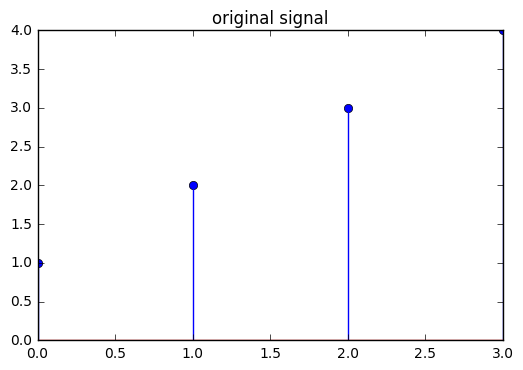

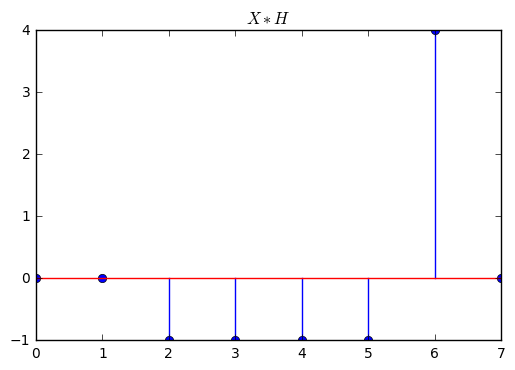

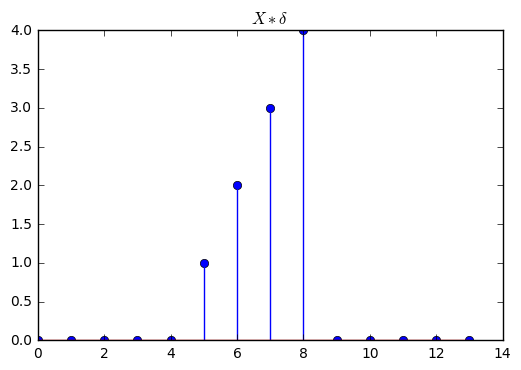

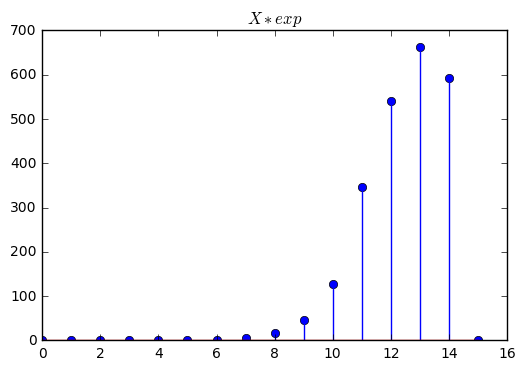

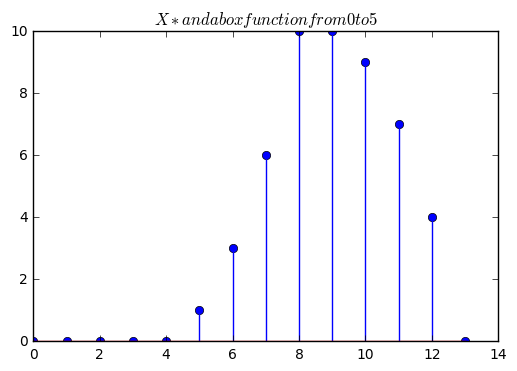

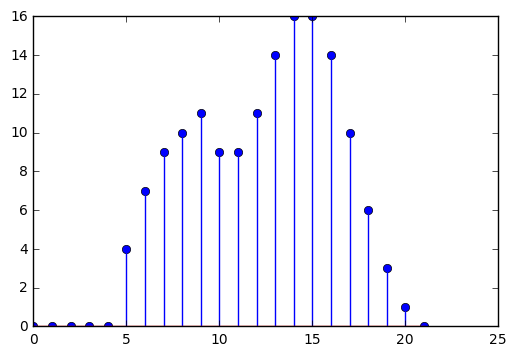

In [44]:
x = np.array([1, 2, 3, 4])
h = np.array([-1,1])



plt.stem(x)
plt.title('original signal')

#1 convoultion off the signal and a given signal h



f1=conv_fn(x,h)
plt.figure()
plt.stem(f1) 
plt.title('$ X * H $')


#2 convulotion by the signal and the impulse dirac
h2 = dirac(0,5)


f2 = conv_fn(x,h2)


plt.figure()
plt.stem(f2)
plt.title('$ X * \delta $')


#3convolution off the signal and the exponantial function
h3 = np.zeros(6)
for i in range(0,h3.size):
    h3[i] = math.exp(i)
    
f3 = conv_fn(x,h3)

plt.figure()
plt.stem(f3)
plt.title('$ X * exp $')

#4convolution from signal and step signal
h4 = H_FUNC(0,5)


f4 = conv_fn(x,h4)

plt.figure()
plt.stem(f4)
plt.title('$ X * and a box function from 0 to 5 $')

#5  Consider the previous input signal, we wrote the symmetric version and we did the convoultion
x2 = np.array([4,3,2,1,1, 2, 3, 4,4,3,2,1])
h5 = H_FUNC(0,5)


f5 = conv_fn(x2,h5)

plt.figure()
plt.stem(f5)



## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [45]:
def conv2d(x, h):
    #zero padding in both row and column direction
    endv = x.shape[0] + 2*h.shape[0]
    endh = x.shape[1] + 2*h.shape[1]
   

    X_pad = np.zeros((endv, endh))
    X_pad[h.shape[0]:h.shape[0] + x.shape[0],h.shape[1]:h.shape[1] + x.shape[1]] = x[:,:]

    y2d = np.zeros((X_pad.shape[0], X_pad.shape[1]))

    for n1 in range(0, X_pad.shape[0]):
        for n2 in range (0, X_pad.shape[1]):
            for k1 in range(0, h.shape[0]):
                for k2 in range (0, h.shape[1]): 
                    y2d[n1,n2] = y2d[n1,n2] + X_pad[n1-k1, n2-k2]* h[k1, k2]

     
    return y2d

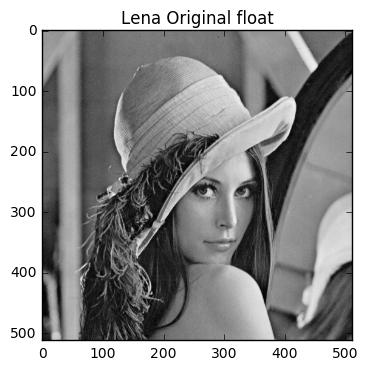

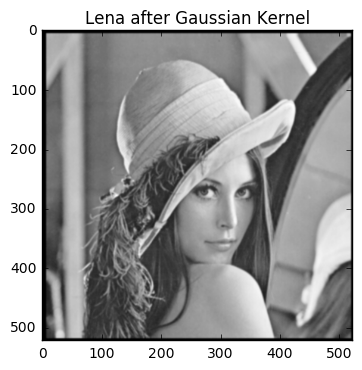

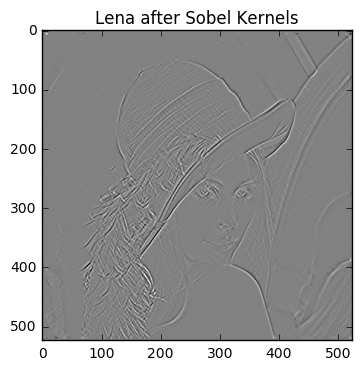

In [46]:
Path = '../images/'
image_name ='lena-grey.bmp'
lena_im = io.imread(Path.__add__(image_name))
lena_im = img_as_float(lena_im)

plt.figure
plt.imshow(lena_im, cmap=plt.cm.gray)
plt.title('Lena Original float')
plt.show() 
K = 1/256 * np.array([[1,4,6,4,1],[4, 16, 24, 16, 4],[6, 24,36,24,6],[4, 16, 24, 16, 4], [1,4,6,4,1]])
y2d = conv2d_fn(lena_im, K)

plt.figure
plt.imshow(y2d, cmap=plt.cm.gray)
plt.title('Lena after Gaussian Kernel')
plt.show() 

#Sobel matrices, both horizontal and vertical operations
sobel_1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

#Cascaded convolution:two conv2d in consecutive
y_sobel = conv2d(conv2d(lena_im, sobel_1), sobel_2)
plt.figure
plt.imshow(y_sobel, cmap=plt.cm.gray)
plt.title('Lena after Sobel Kernels')
plt.show()

## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

/home/nayeem/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


30 142
30 142
30 142
30 142
30 142
30 142
30 142
30 142
30 142
30 142


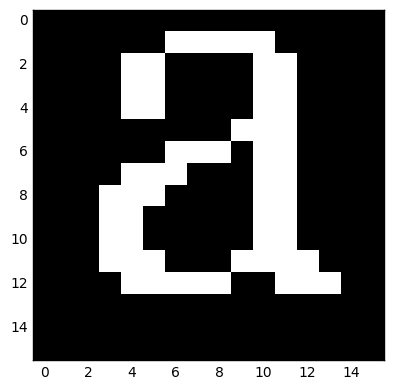

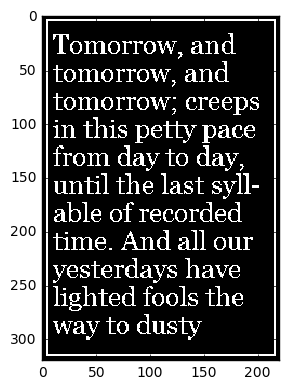

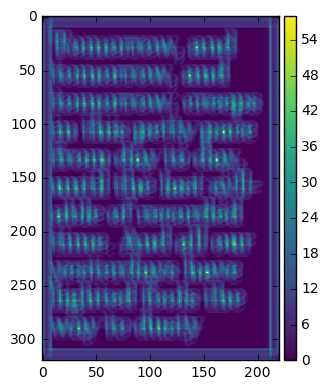

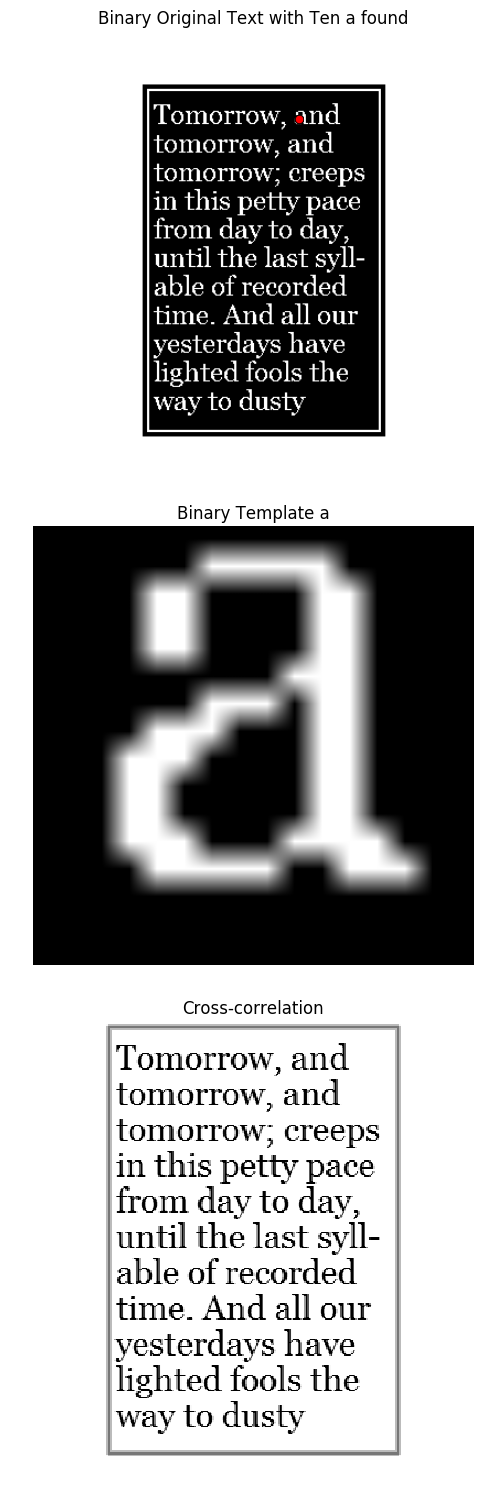

In [51]:
letter_a = io.imread("../images/a.png",as_grey = True);

thres_a = filters.threshold_otsu(letter_a);
compare_a = a_ref < thres_a;
compare_a = img_as_float(compare_a);


img = io.imread("../images/text.png",as_grey = True);

thres_img = filters.threshold_otsu(img);
compare_img = text < thres_img;
compare_img = img_as_float(compare_img);

io.imshow(compare_a);
plt.figure();
io.imshow(compare_img);

corr = signal.correlate2d(compare_img, compare_a, 'same', 'symm')
plt.figure()
io.imshow(corr)

fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))

ax_template.imshow(compare_a, cmap='gray')
ax_template.set_title('Binary Template a')
ax_template.set_axis_off() 
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.imshow(compare_img, cmap='gray')
ax_orig.set_title('Binary Original Text with Ten a found')
ax_orig.set_axis_off()


for count in range (10):

    y,x = np.unravel_index(np.argmax(corr), corr.shape)
    print(y,x)
    ax_orig.plot(x, y, 'ro')
    
    io.imshow(text)
   
    
    cross[y, x] = 0